In [1]:
%run Common.ipynb

In [2]:
import os.path
import pandas as pd

#!pip install surprise
from surprise import Dataset, Reader
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate

#new function added for Q15
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import label_binarize
from surprise.model_selection import train_test_split #train, test data split

np.set_printoptions(suppress=True,floatmode='maxprec_equal')

<h1>Question 15</h1>

In [3]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

In [4]:
trainset, testset = train_test_split(data, test_size=.1)

In [5]:
sim_options = {'name': 'pearson',
               'user_based': True  # compute similarities between users
               }

In [6]:
#k from Q11 is 18
k = 18
knn = KNNWithMeans(k, sim_options=sim_options, verbose=False)
_ = knn.fit(trainset)

In [7]:
predictions = knn.test(testset)

<h3>Threshold: 2.5</h3>

In [8]:
threshold = 2.5
binarizer = Binarizer(threshold=threshold)

In [9]:
test_preds = np.array([i.est for i in predictions])
test_preds

array([3.89602383, 2.88016698, 4.43639947, ..., 3.18367582, 3.12084268,
       3.06693835])

In [10]:
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
test_labels_bin

array([[1., 1., 1., ..., 0., 0., 1.]])

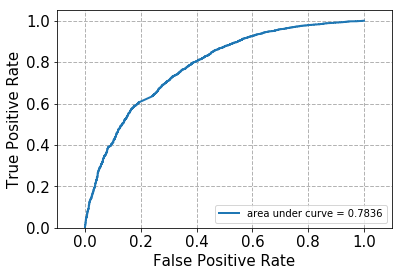

In [11]:
fpr, tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))
plot_roc(fpr, tpr)

In [12]:
roc_auc = auc(fpr, tpr)
print("Area under curve: %.4f" %roc_auc)

Area under curve: 0.7836


<h3>Threshold: 3.0</h3>

Area under curve: 0.7663


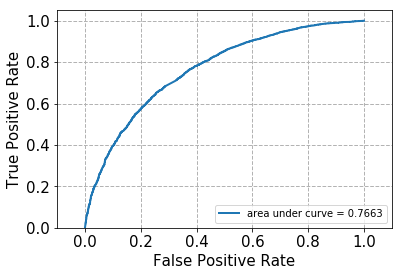

In [13]:
threshold = 3.0
binarizer = Binarizer(threshold=threshold)
test_preds = np.array([i.est for i in predictions])
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
fpr, tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))
plot_roc(fpr, tpr)
roc_auc = auc(fpr, tpr)
print("Area under curve: %.4f" %roc_auc)

<h3>Threshold: 3.5</h3>

Area under curve: 0.7628


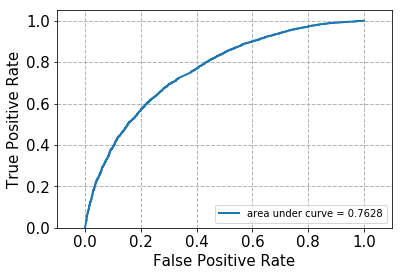

In [14]:
threshold = 3.5
binarizer = Binarizer(threshold=threshold)
test_preds = np.array([i.est for i in predictions])
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
fpr, tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))
plot_roc(fpr, tpr)
roc_auc = auc(fpr, tpr)
print("Area under curve: %.4f" %roc_auc)

<h3>Threshold: 4.0</h3>

Area under curve: 0.7636


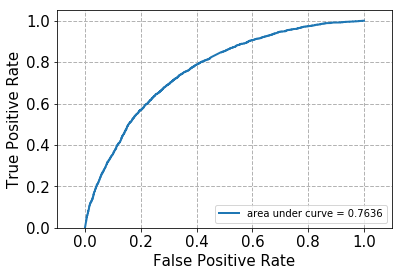

In [15]:
threshold = 4.0
binarizer = Binarizer(threshold=threshold)
test_preds = np.array([i.est for i in predictions])
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
fpr, tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))
plot_roc(fpr, tpr)
roc_auc = auc(fpr, tpr)
print("Area under curve: %.4f" %roc_auc)